# Artificial Intelligence
## Solving Sudoku Puzzle
### Team: Aram Adamyan, Hovhannes Hovhannisyan, Ararat Kazarian

- [AHA Algorithm](#aha)
- [Backtracking Algorithm](#backtrack)
- [Genetic Algorithm](#genetic)
- [Simulated Algorithm](#annealing)
- [Hill Climbing Algorithm](#hill)

In [24]:
import pandas as pd
import math
import copy
import time 
import random
import numpy as np
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv("sudoku.csv")
df = df.sample(10000)

In [26]:
df1 = pd.DataFrame(df.puzzle)

# Function to convert a Sudoku string to a 9x9 matrix with lists
def sudoku_string_to_matrix(sudoku_str):
    sudoku_list = list(sudoku_str)
    sudoku_list = ['0' if char == '.' else char for char in sudoku_list]
    rows = [sudoku_list[i:i + 9] for i in range(0, len(sudoku_list), 9)]
    return [[int(cell) for cell in row] for row in rows]

# Apply the function to the 'puzzle' column to create a new column 'sudoku_matrix'
df1['sudoku_matrix'] = df1['puzzle'].apply(sudoku_string_to_matrix)
final = pd.merge(df, df1, on='puzzle')

In [27]:
# Function to determine the level based on the difficulty value
def get_level(difficulty):
    if difficulty <= 1.0:
        return 'easy'
    elif difficulty <= 2.2 and difficulty >= 1.2:
        return 'medium'
    elif difficulty > 2.2:
        return 'hard'

# Apply the function to create the 'level' column
final['level'] = final['difficulty'].apply(get_level)
final1 = final

<a id='aha'></a>
# AHA Algorithm

In [17]:
# import the builtin time module
import time

# N is the size of the 2D matrix N*N
N = 9

# A utility function to print grid
def printing(arr):
    for i in range(N):
        for j in range(N):
            print(arr[i][j], end=" ")
        print()

# Find the unassigned cell with Minimum Remaining Values (MRV) heuristic
def find_unassigned_cell(grid):
    min_remaining = float('inf')
    cell = None
    for i in range(N):
        for j in range(N):
            if grid[i][j] == 0:
                remaining = count_remaining_values(grid, i, j)
                if remaining < min_remaining:
                    min_remaining = remaining
                    cell = (i, j)
    return cell

# Count the number of remaining valid values for a given cell (i, j)
def count_remaining_values(grid, i, j):
    values = set(range(1, N + 1))
    for x in range(N):
        values.discard(grid[i][x])
        values.discard(grid[x][j])

    startRow = i - i % 3
    startCol = j - j % 3
    for a in range(3):
        for b in range(3):
            values.discard(grid[a + startRow][b + startCol])

    return len(values)

# Checks whether it will be legal to assign num to the given row, col
def is_safe(grid, row, col, num):
    # Check if we find the same num in the similar row, we return false
    for x in range(N):
        if grid[row][x] == num:
            return False

    # Check if we find the same num in the similar column, we return false
    for x in range(N):
        if grid[x][col] == num:
            return False

    # Check if we find the same num in the particular 3*3 matrix, we return false
    startRow = row - row % 3
    startCol = col - col % 3
    for i in range(3):
        for j in range(3):
            if grid[i + startRow][j + startCol] == num:
                return False

    return True

# Main function to solve Sudoku using constraint propagation and backtracking
def solve_sudoku(grid):
    # Find the unassigned cell with MRV heuristic
    cell = find_unassigned_cell(grid)
    if not cell:
        return True

    row, col = cell

    for num in range(1, N + 1):
        if is_safe(grid, row, col, num):
            grid[row][col] = num
            if solve_sudoku(grid):
                return True
            grid[row][col] = 0  # If the current num doesn't lead to a solution, reset the cell and backtrack

    return False

In [18]:
import copy
# Function to process the DataFrame and calculate total time for each puzzle
def process_sudoku_dataframe(final1):
    level_list = []
    total_time_list = []

    for i in range(len(final1)):
        start_time = time.time()
        grid = copy.deepcopy(final1.sudoku_matrix.iloc[i])
        if solve_sudoku(grid):
            pass
        else:
            print("There is no solution", grid)

        end_time = time.time()
        total_time = end_time - start_time

        level_list.append(final1.level.iloc[i])
        total_time_list.append(total_time)

    # Create a new DataFrame with the results
    result_df = pd.DataFrame({'level': level_list, 'total_time': total_time_list})
    return result_df

# Assuming 'final' is the DataFrame containing Sudoku puzzles and levels
# Call the function to process the DataFrame
result_dataframe = process_sudoku_dataframe(final1)

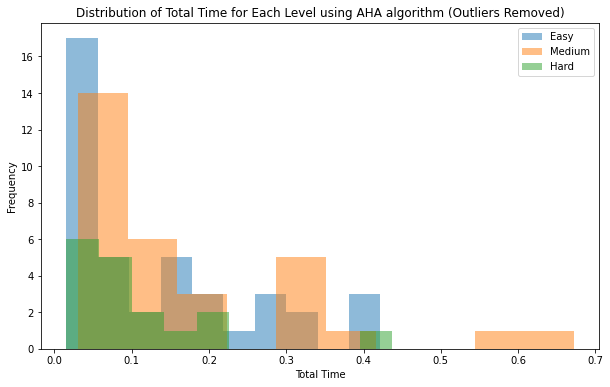

In [19]:
# Function to remove outliers using the IQR method
def remove_outliers_iqr(data_series, factor=1.5):
    q1 = data_series.quantile(0.25)
    q3 = data_series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - factor * iqr
    upper_bound = q3 + factor * iqr
    return data_series[(data_series >= lower_bound) & (data_series <= upper_bound)]

# Create separate DataFrames for each level
easy_df = result_dataframe[result_dataframe['level'] == 'easy']
medium_df = result_dataframe[result_dataframe['level'] == 'medium']
hard_df = result_dataframe[result_dataframe['level'] == 'hard']

# Remove outliers for each level
factor = 1.5  # Adjust this factor based on your preference for outlier removal
easy_df_cleaned = remove_outliers_iqr(easy_df['total_time'], factor)
medium_df_cleaned = remove_outliers_iqr(medium_df['total_time'], factor)
hard_df_cleaned = remove_outliers_iqr(hard_df['total_time'], factor)

# Plot histograms for each level with outliers removed
plt.figure(figsize=(10, 6))
plt.hist(easy_df_cleaned, bins=10, alpha=0.5, label='Easy')
plt.hist(medium_df_cleaned, bins=10, alpha=0.5, label='Medium')
plt.hist(hard_df_cleaned, bins=10, alpha=0.5, label='Hard')

plt.xlabel('Total Time')
plt.ylabel('Frequency')
plt.title('Distribution of Total Time for Each Level using AHA algorithm (Outliers Removed)')
plt.legend()
plt.show()


<a id = 'backtrack'></a>
## Backtracking Algorithm

In [20]:
# A Utility Function to print the Grid
def print_grid(arr):
    for i in range(9):
        for j in range(9):
            print (arr[i][j], end = " "),
        print ()

         
# Function to Find the entry in
# the Grid that is still  not used
# Searches the grid to find an
# entry that is still unassigned. If
# found, the reference parameters
# row, col will be set the location
# that is unassigned, and true is
# returned. If no unassigned entries
# remains, false is returned.
# 'l' is a list  variable that has
# been passed from the solve_sudoku function
# to keep track of incrementation
# of Rows and Columns
def find_empty_location(arr, l):
    for row in range(9):
        for col in range(9):
            if(arr[row][col]== 0):
                l[0]= row
                l[1]= col
                return True
    return False
 
# Returns a boolean which indicates
# whether any assigned entry
# in the specified row matches
# the given number.
def used_in_row(arr, row, num):
    for i in range(9):
        if(arr[row][i] == num):
            return True
    return False
 
# Returns a boolean which indicates
# whether any assigned entry
# in the specified column matches
# the given number.
def used_in_col(arr, col, num):
    for i in range(9):
        if(arr[i][col] == num):
            return True
    return False
 
# Returns a boolean which indicates
# whether any assigned entry
# within the specified 3x3 box
# matches the given number
def used_in_box(arr, row, col, num):
    for i in range(3):
        for j in range(3):
            if(arr[i + row][j + col] == num):
                return True
    return False
 
# Checks whether it will be legal
# to assign num to the given row, col
# Returns a boolean which indicates
# whether it will be legal to assign
# num to the given row, col location.
def check_location_is_safe(arr, row, col, num):
     
    # Check if 'num' is not already
    # placed in current row,
    # current column and current 3x3 box
    return (not used_in_row(arr, row, num) and
           (not used_in_col(arr, col, num) and
           (not used_in_box(arr, row - row % 3,
                           col - col % 3, num))))
 
# Takes a partially filled-in grid
# and attempts to assign values to
# all unassigned locations in such a
# way to meet the requirements
# for Sudoku solution (non-duplication
# across rows, columns, and boxes)
def solve_sudoku_backtracking(arr):
     
    # 'l' is a list variable that keeps the
    # record of row and col in
    # find_empty_location Function   
    l =[0, 0]
     
    # If there is no unassigned
    # location, we are done   
    if(not find_empty_location(arr, l)):
        return True
     
    # Assigning list values to row and col
    # that we got from the above Function
    row = l[0]
    col = l[1]
     
    # consider digits 1 to 9
    for num in range(1, 10):
         
        # if looks promising
        if(check_location_is_safe(arr,
                          row, col, num)):
             
            # make tentative assignment
            arr[row][col]= num
 
            # return, if success,
            # ya !
            if(solve_sudoku_backtracking(arr)):
                return True
 
            # failure, unmake & try again
            arr[row][col] = 0
             
    # this triggers backtracking       
    return False
 

In [21]:
# Function to process the DataFrame and calculate total time for each puzzle
def process_sudoku_dataframe(final2):
    level_list = []
    total_time_list = []

    for i in range(len(final2)):
        start_time = time.time()
        grid = copy.deepcopy(final2.sudoku_matrix.iloc[i])
        if solve_sudoku_backtracking(grid):
            pass
        else:
            print("There is no solution", grid)

        end_time = time.time()
        total_time = end_time - start_time

        level_list.append(final2.level.iloc[i])
        total_time_list.append(total_time)

    # Create a new DataFrame with the results
    result_df = pd.DataFrame({'level': level_list, 'total_time': total_time_list})
    return result_df

# Assuming 'final' is the DataFrame containing Sudoku puzzles and levels
# Call the function to process the DataFrame
result_dataframe_back = process_sudoku_dataframe(final1)

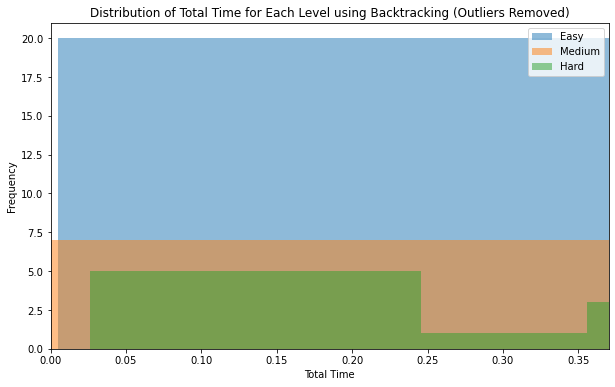

In [23]:
# Function to remove outliers using the IQR method
def remove_outliers_iqr(data_series, factor=1.5):
    q1 = data_series.quantile(0.25)
    q3 = data_series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - factor * iqr
    upper_bound = q3 + factor * iqr
    return data_series[(data_series >= lower_bound) & (data_series <= upper_bound)]

# Create separate DataFrames for each level
easy_df = result_dataframe_back[result_dataframe_back['level'] == 'easy']
medium_df = result_dataframe_back[result_dataframe_back['level'] == 'medium']
hard_df = result_dataframe_back[result_dataframe_back['level'] == 'hard']

# Remove outliers for each level
factor = 1.5  # Adjust this factor based on your preference for outlier removal
easy_df_cleaned = remove_outliers_iqr(easy_df['total_time'], factor)
medium_df_cleaned = remove_outliers_iqr(medium_df['total_time'], factor)
hard_df_cleaned = remove_outliers_iqr(hard_df['total_time'], factor)

# Plot histograms for each level with outliers removed
plt.figure(figsize=(10, 6))
plt.hist(easy_df_cleaned, bins=10, alpha=0.5, label='Easy')
plt.hist(medium_df_cleaned, bins=10, alpha=0.5, label='Medium')
plt.hist(hard_df_cleaned, bins=10, alpha=0.5, label='Hard')

plt.xlim([0, 0.37])
plt.xlabel('Total Time')
plt.ylabel('Frequency')
plt.title('Distribution of Total Time for Each Level using Backtracking (Outliers Removed)')
plt.legend()
plt.show()

<a id = 'genetic'></a>
## Genetic Algorithm

In [24]:
import random
import time

start = time.time()

def print_grid(arr):
    for i in range(9):
        for j in range(9):
            print(arr[i][j], end=" ")
        print()

def calculate_conflicts(arr):
    # Calculate the number of conflicts in the Sudoku grid
    conflicts = 0
    for row in range(9):
        for col in range(9):
            num = arr[row][col]
            if num != 0:
                if used_in_row(arr, row, col, num) or used_in_col(arr, row, col, num) or used_in_box(arr, row, col, num):
                    conflicts += 1
    return conflicts

def used_in_row(arr, row, col, num):
    for i in range(9):
        if i != col and arr[row][i] == num:
            return True
    return False

def used_in_col(arr, row, col, num):
    for i in range(9):
        if i != row and arr[i][col] == num:
            return True
    return False

def used_in_box(arr, row, col, num):
    box_start_row, box_start_col = 3 * (row // 3), 3 * (col // 3)
    for i in range(box_start_row, box_start_row + 3):
        for j in range(box_start_col, box_start_col + 3):
            if (i != row or j != col) and arr[i][j] == num:
                return True
    return False

def generate_random_individual(grid):
    individual = [[0 for _ in range(9)] for _ in range(9)]
    for row in range(9):
        for col in range(9):
            if grid[row][col] != 0:  # Use preassigned values
                individual[row][col] = grid[row][col]
            else:
                valid_nums = [num for num in range(1, 10) if not used_in_row(individual, row, col, num) and
                              not used_in_col(individual, row, col, num) and not used_in_box(individual, row, col, num)]
                if valid_nums:
                    individual[row][col] = random.choice(valid_nums)
    return individual

def mutate(individual, mutation_rate):
    # Randomly change some cells in the individual, but leave the preassigned values as they are
    for row in range(9):
        for col in range(9):
            if individual[row][col] == 0 and random.random() < mutation_rate:
                valid_nums = [num for num in range(1, 10) if not used_in_row(individual, row, col, num) and
                              not used_in_col(individual, row, col, num) and not used_in_box(individual, row, col, num)]
                if valid_nums:
                    individual[row][col] = random.choice(valid_nums)
    return individual

def fitness(individual):
    # Fitness function: Number of conflicts in the Sudoku grid
    return calculate_conflicts(individual)

def crossover(parent1, parent2):
    # Single-point crossover
    crossover_point = random.randint(0, 8)
    child1 = [parent1[row][:crossover_point] + parent2[row][crossover_point:] for row in range(9)]
    child2 = [parent2[row][:crossover_point] + parent1[row][crossover_point:] for row in range(9)]
    return child1, child2

def genetic_algorithm(grid, population_size=100, crossover_rate=0.8, mutation_rate=0.1, max_generations=10000):
    population = [generate_random_individual(grid) for _ in range(population_size)]

    for generation in range(max_generations):
        population = sorted(population, key=lambda x: fitness(x))

        if fitness(population[0]) == 0:
            return population[0]  # Solution found

        next_generation = population[:population_size // 2]  # Elitism: Keep the best half of the population

        while len(next_generation) < population_size:
            parent1 = random.choice(population[:population_size // 2])  # Select a parent from the top half
            parent2 = random.choice(population[:population_size // 2])  # Select another parent from the top half

            if random.random() < crossover_rate:
                child1, child2 = crossover(parent1, parent2)
                next_generation.append(child1)
                next_generation.append(child2)

        population = next_generation

        for individual in population:
            if random.random() < mutation_rate:
                mutate(individual, mutation_rate)

In [ ]:
# Function to process the DataFrame and calculate total time for each puzzle
def process_sudoku_dataframe(final2):
    level_list = []
    total_time_list = []

    for i in range(len(final2)):
        start_time = time.time()
        grid = copy.deepcopy(final2.sudoku_matrix.iloc[i])
        if genetic_algorithm(grid):
            pass
        else:
            print("There is no solution", grid)

        end_time = time.time()
        total_time = end_time - start_time

        level_list.append(final2.level.iloc[i])
        total_time_list.append(total_time)

    # Create a new DataFrame with the results
    result_df = pd.DataFrame({'level': level_list, 'total_time': total_time_list})
    return result_df

# Assuming 'final' is the DataFrame containing Sudoku puzzles and levels
# Call the function to process the DataFrame
result_dataframe_gen = process_sudoku_dataframe(final1)

In [ ]:
# Function to remove outliers using the IQR method
def remove_outliers_iqr(data_series, factor=1.5):
    q1 = data_series.quantile(0.25)
    q3 = data_series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - factor * iqr
    upper_bound = q3 + factor * iqr
    return data_series[(data_series >= lower_bound) & (data_series <= upper_bound)]

# Create separate DataFrames for each level
easy_df = result_dataframe_gen[result_dataframe_gen['level'] == 'easy']
medium_df = result_dataframe_gen[result_dataframe_gen['level'] == 'medium']
hard_df = result_dataframe_gen[result_dataframe_gen['level'] == 'hard']

# Remove outliers for each level
factor = 1.5  # Adjust this factor based on your preference for outlier removal
easy_df_cleaned = remove_outliers_iqr(easy_df['total_time'], factor)
medium_df_cleaned = remove_outliers_iqr(medium_df['total_time'], factor)
hard_df_cleaned = remove_outliers_iqr(hard_df['total_time'], factor)

# Plot histograms for each level with outliers removed
plt.figure(figsize=(10, 6))
plt.hist(easy_df_cleaned, bins=10, alpha=0.5, label='Easy')
plt.hist(medium_df_cleaned, bins=10, alpha=0.5, label='Medium')
plt.hist(hard_df_cleaned, bins=10, alpha=0.5, label='Hard')

plt.xlabel('Total Time')
plt.ylabel('Frequency')
plt.title('Distribution of Total Time for Each Level using Genetic algorithm (Outliers Removed)')
plt.legend()
plt.show()


<a id = 'annealing'></a>
## Simulated Annealing

In [10]:
# Define the size of the Sudoku grid
N = 9

# Define the number of digits in each row, column, and box
DIGITS = set(range(1, N+1))

def is_valid_move(grid, row, col, num):
    # Check if the number is not already present in the row, column, and box
    return (
        num not in grid[row] and
        num not in [grid[i][col] for i in range(N)] and
        num not in get_box_elements(grid, row, col)
    )

def get_box_elements(grid, row, col):
    box_start_row, box_start_col = 3 * (row // 3), 3 * (col // 3)
    return [
        grid[i][j]
        for i in range(box_start_row, box_start_row + 3)
        for j in range(box_start_col, box_start_col + 3)
    ]

def generate_neighbor(grid):
    # Randomly select an empty cell and assign a valid number to it
    empty_cells = [(i, j) for i in range(N) for j in range(N) if grid[i][j] == 0]
    if not empty_cells:
        return grid  # No empty cell to fill, return the same grid

    row, col = random.choice(empty_cells)
    valid_nums = [num for num in range(1, N + 1) if is_valid_move(grid, row, col, num)]
    if valid_nums:
        new_value = random.choice(valid_nums)
        new_grid = [row[:] for row in grid]
        new_grid[row][col] = new_value
        return new_grid
    return grid  # If no valid number found, return the same grid

def is_valid_solution(grid):
    # Check if the grid is a valid Sudoku solution
    return all(
        len(set(row)) == N and len(set(grid[i][j] for i in range(N))) == N
        for j in range(N)
        for row in [grid[i] for i in range(N)]
    )

class SudokuProblem(object):
    def __init__(self, initial_grid):
        self.grid = initial_grid
        self.beta = 100000.0
        self.energy = self.calculate_energy()

    def set_beta(self, beta):
        self.beta = beta

    def MC_move(self):
        new_grid = generate_neighbor(self.grid)
        new_energy = self.calculate_energy(new_grid)
        dE = new_energy - self.energy

        if dE < 0.0 or random.random() < math.exp(-self.beta * dE):
            self.grid = new_grid
            self.energy = new_energy

    def calculate_energy(self, grid=None):
        grid = grid if grid is not None else self.grid
        return -np.sum([1 for i in range(N) for j in range(N) if grid[i][j] != 0])

    def get_solution(self):
        return self.grid


def simulated_annealing(initial_grid, max_iterations=10000, initial_temperature=1.0, cooling_rate=0.995):
    '''
    Simulated annealing optimization function for the Sudoku problem.
    Input:
      *initial_grid*        : a 9x9 matrix representing the Sudoku puzzle with 0 for empty cells
      *max_iterations*      : maximum number of iterations for the simulated annealing
      *initial_temperature* : initial temperature for simulated annealing
      *cooling_rate*        : cooling rate for simulated annealing

    Output:
      *solution*      : the Sudoku grid with filled cells (if a solution is found)
      *elapsed_time*  : time it took, in seconds
    '''

    time_start = time.time()
    problem = SudokuProblem(initial_grid)
    problem.set_beta(1.0 / initial_temperature)
    for iteration in range(max_iterations):
        if is_valid_solution(problem.grid):
            break  # Valid solution found, exit the loop
        problem.MC_move()
        # Cool down the temperature
        problem.set_beta(problem.beta * cooling_rate)
    elapsed_time = time.time() - time_start
    return problem.get_solution(), elapsed_time

In [11]:
# Function to process the DataFrame and calculate total time for each puzzle
def process_sudoku_dataframe(final2):
    level_list = []
    total_time_list = []

    for i in range(len(final2)):
        start_time = time.time()
        grid = copy.deepcopy(final2.sudoku_matrix.iloc[i])
        if simulated_annealing(grid):
            pass
        else:
            print("There is no solution", grid)

        end_time = time.time()
        total_time = end_time - start_time

        level_list.append(final2.level.iloc[i])
        total_time_list.append(total_time)

    # Create a new DataFrame with the results
    result_df = pd.DataFrame({'level': level_list, 'total_time': total_time_list})
    return result_df

# Assuming 'final' is the DataFrame containing Sudoku puzzles and levels
# Call the function to process the DataFrame
result_dataframe_annealing = process_sudoku_dataframe(final1)

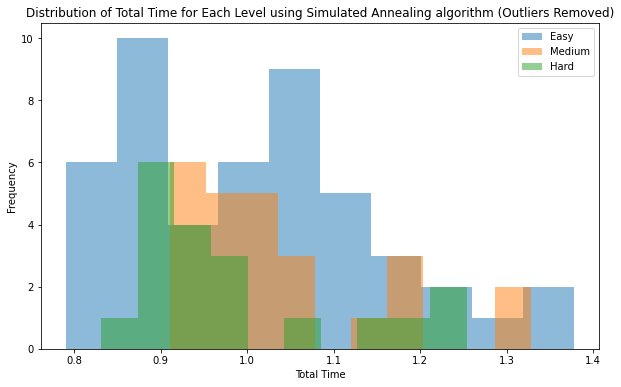

In [12]:
# Function to remove outliers using the IQR method
def remove_outliers_iqr(data_series, factor=1.5):
    q1 = data_series.quantile(0.25)
    q3 = data_series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - factor * iqr
    upper_bound = q3 + factor * iqr
    return data_series[(data_series >= lower_bound) & (data_series <= upper_bound)]

# Create separate DataFrames for each level
easy_df = result_dataframe_annealing[result_dataframe_annealing['level'] == 'easy']
medium_df = result_dataframe_annealing[result_dataframe_annealing['level'] == 'medium']
hard_df = result_dataframe_annealing[result_dataframe_annealing['level'] == 'hard']
# 
# Remove outliers for each level
factor = 1.5  # Adjust this factor based on your preference for outlier removal
easy_df_cleaned = remove_outliers_iqr(easy_df['total_time'], factor)
medium_df_cleaned = remove_outliers_iqr(medium_df['total_time'], factor)
hard_df_cleaned = remove_outliers_iqr(hard_df['total_time'], factor)

# Plot histograms for each level with outliers removed
plt.figure(figsize=(10, 6))
plt.hist(easy_df_cleaned, bins=10, alpha=0.5, label='Easy')
plt.hist(medium_df_cleaned, bins=10, alpha=0.5, label='Medium')
plt.hist(hard_df_cleaned, bins=10, alpha=0.5, label='Hard')

plt.xlabel('Total Time')
plt.ylabel('Frequency')
plt.title('Distribution of Total Time for Each Level using Simulated Annealing algorithm (Outliers Removed)')
plt.legend()
plt.show()


<a id = 'hill'></a>
## Hill Climbing

In [7]:
# Define the size of the Sudoku grid
N = 9

# Define the number of digits in each row, column, and box
DIGITS = set(range(1, N+1))

def is_valid_move(grid, row, col, num):
    # Check if the number is not already present in the row, column, and box
    return (
        num not in grid[row] and
        num not in [grid[i][col] for i in range(N)] and
        num not in get_box_elements(grid, row, col)
    )

def get_box_elements(grid, row, col):
    box_start_row, box_start_col = 3 * (row // 3), 3 * (col // 3)
    return [
        grid[i][j]
        for i in range(box_start_row, box_start_row + 3)
        for j in range(box_start_col, box_start_col + 3)
    ]

def generate_neighbor(grid):
    # Randomly select an empty cell and assign a valid number to it
    empty_cells = [(i, j) for i in range(N) for j in range(N) if grid[i][j] == 0]
    if not empty_cells:
        return grid  # No empty cell to fill, return the same grid

    row, col = random.choice(empty_cells)
    valid_nums = [num for num in range(1, N + 1) if is_valid_move(grid, row, col, num)]
    if valid_nums:
        new_value = random.choice(valid_nums)
        new_grid = [row[:] for row in grid]
        new_grid[row][col] = new_value
        return new_grid
    return grid  # If no valid number found, return the same grid

def is_valid_solution(grid):
    # Check if the grid is a valid Sudoku solution
    return all(
        len(set(row)) == N and len(set(grid[i][j] for i in range(N))) == N
        for j in range(N)
        for row in [grid[i] for i in range(N)]
    )

class SudokuProblem(object):
    def __init__(self, initial_grid):
        self.grid = initial_grid
        self.energy = self.calculate_energy()

    def MC_move(self):
        new_grid = generate_neighbor(self.grid)
        new_energy = self.calculate_energy(new_grid)
        if new_energy < self.energy:
            self.grid = new_grid
            self.energy = new_energy

    def calculate_energy(self, grid=None):
        grid = grid if grid is not None else self.grid
        return -np.sum([1 for i in range(N) for j in range(N) if grid[i][j] != 0])

    def get_solution(self):
        return self.grid


def hill_climbing(initial_grid, max_iterations=10000):
    '''
    Regular hill-climbing optimization function for the Sudoku problem.
    Input:
      *initial_grid*   : a 9x9 matrix representing the Sudoku puzzle with 0 for empty cells
      *max_iterations* : maximum number of iterations for hill-climbing

    Output:
      *solution*      : the Sudoku grid with filled cells (if a solution is found)
      *elapsed_time*  : time it took, in seconds
    '''

    time_start = time.time()
    problem = SudokuProblem(initial_grid)
    for iteration in range(max_iterations):
        if is_valid_solution(problem.grid):
            break  # Valid solution found, exit the loop
        problem.MC_move()
    elapsed_time = time.time() - time_start
    return problem.get_solution(), elapsed_time

In [8]:
# Function to process the DataFrame and calculate total time for each puzzle
def process_sudoku_dataframe(final2):
    level_list = []
    total_time_list = []

    for i in range(len(final2)):
        start_time = time.time()
        grid = copy.deepcopy(final2.sudoku_matrix.iloc[i])
        if hill_climbing(grid):
            pass
        else:
            print("There is no solution", grid)

        end_time = time.time()
        total_time = end_time - start_time

        level_list.append(final2.level.iloc[i])
        total_time_list.append(total_time)

    # Create a new DataFrame with the results
    result_df = pd.DataFrame({'level': level_list, 'total_time': total_time_list})
    return result_df

# Assuming 'final' is the DataFrame containing Sudoku puzzles and levels
# Call the function to process the DataFrame
result_dataframe_climbing = process_sudoku_dataframe(final1)

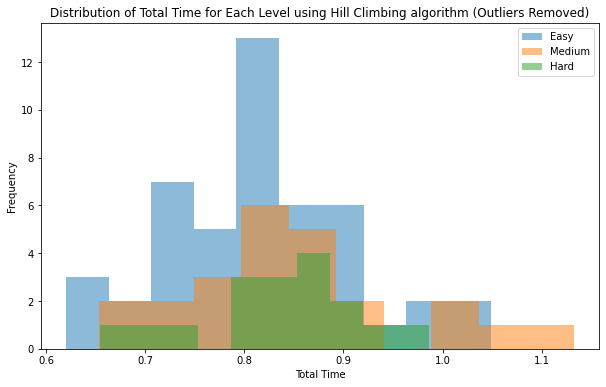

In [9]:
# Function to remove outliers using the IQR method
def remove_outliers_iqr(data_series, factor=1.5):
    q1 = data_series.quantile(0.25)
    q3 = data_series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - factor * iqr
    upper_bound = q3 + factor * iqr
    return data_series[(data_series >= lower_bound) & (data_series <= upper_bound)]

# Create separate DataFrames for each level
easy_df = result_dataframe_climbing[result_dataframe_climbing['level'] == 'easy']
medium_df = result_dataframe_climbing[result_dataframe_climbing['level'] == 'medium']
hard_df = result_dataframe_climbing[result_dataframe_climbing['level'] == 'hard']

# Remove outliers for each level
factor = 1.5  # Adjust this factor based on your preference for outlier removal
easy_df_cleaned = remove_outliers_iqr(easy_df['total_time'], factor)
medium_df_cleaned = remove_outliers_iqr(medium_df['total_time'], factor)
hard_df_cleaned = remove_outliers_iqr(hard_df['total_time'], factor)

# Plot histograms for each level with outliers removed
plt.figure(figsize=(10, 6))
plt.hist(easy_df_cleaned, bins=10, alpha=0.5, label='Easy')
plt.hist(medium_df_cleaned, bins=10, alpha=0.5, label='Medium')
plt.hist(hard_df_cleaned, bins=10, alpha=0.5, label='Hard')

plt.xlabel('Total Time')
plt.ylabel('Frequency')
plt.title('Distribution of Total Time for Each Level using Hill Climbing algorithm (Outliers Removed)')
plt.legend()
plt.show()